# Metropolis Algorithm

### Import the necessary libraries

In [9]:
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt

### Define π(x)

In [10]:
def pi(x, mean, cov):
    '''

    Density of the target distribution, up to a constant.

    x -- np array of size k
    V -- np array of size k*k
    '''
    return np.e**(-0.5*(x-mean).T@np.linalg.inv(cov)@(x-mean))

### Define q(x)

In [11]:
# define the proposal distribution
def q(x, cov=np.identity(3)):
    '''
    Random proposition for the Metropolis-Hastings algorithm.
    Uses the multivariate normal distribution with mean x and covariance cov.

    x -- np array of size k
    '''
    return np.random.multivariate_normal(x, cov)

### The main algorithm of the notebook, Random-Walk Metropolis

In [12]:
def random_walk_metropolis(N, pi, q, x0, mean, cov, burn_in, thinning):
    x = x0
    chain = np.zeros([N, 3])

    counter_thin = 0
    sample_size = 0
    counter = 0
    while sample_size < N:
        y = q(x)
        ratio = pi(y, mean, cov)/pi(x, mean, cov)

        a = np.min([1.,ratio])
        r = np.random.rand()
        if r < a:
            x = y
        # this is responsible for gathering samples in harmony with the rules set by burnin/thinning
        if counter>burn_in and (counter_thin == thinning or sample_size == 0):
            counter_thin = 0
            chain[sample_size] = x
            sample_size+= 1
        counter_thin += 1
        counter += 1
    return chain

### Define the mean/cov and the rest of the arguments to start the simulation

In [13]:
burn_in = 400
thinning = 10
num_samples = 1000
mean = np.array([1, 2, -1]).T
cov = np.array([[1, 0.95, 0.3],
                [0.95, 2, 0.9],
                [0.3, 0.9, 3]])
initial_point = [24.2, 42.1, 2.3]
chain = random_walk_metropolis(num_samples, pi, q, initial_point, mean, cov, burn_in, thinning)
sample_mean = np.mean(chain, axis = 0)
sample_std = np.std(chain, axis = 0)

print("The simulated mean is: {}".format(np.around(sample_mean, decimals=2)))

print("The simulated standard deviation is: {}".format(np.around(sample_std, decimals=2)))

The simulated mean is: [ 0.95  1.95 -0.95]
The simulated standard deviation is: [1.03 1.48 1.77]


### Plot the chain for each dimension in order to visually spot a good burn-in value

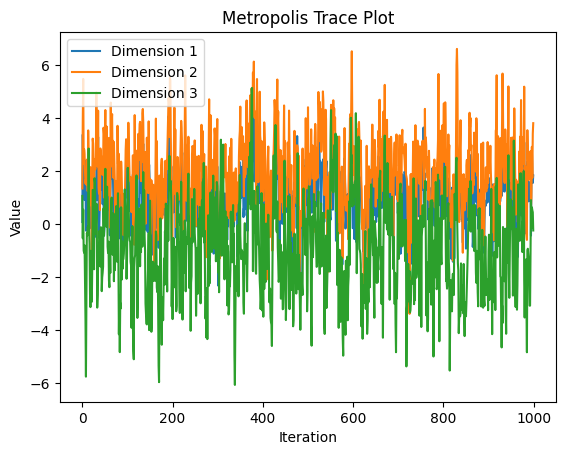

In [17]:
for i in range(chain.shape[1]):
    plt.plot(chain[:, i], label=f"Dimension {i+1}")

# Add labels and legend
plt.title("Metropolis Trace Plot")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()

# Show the plot
plt.show()

### Plot the covariance ellipsoid

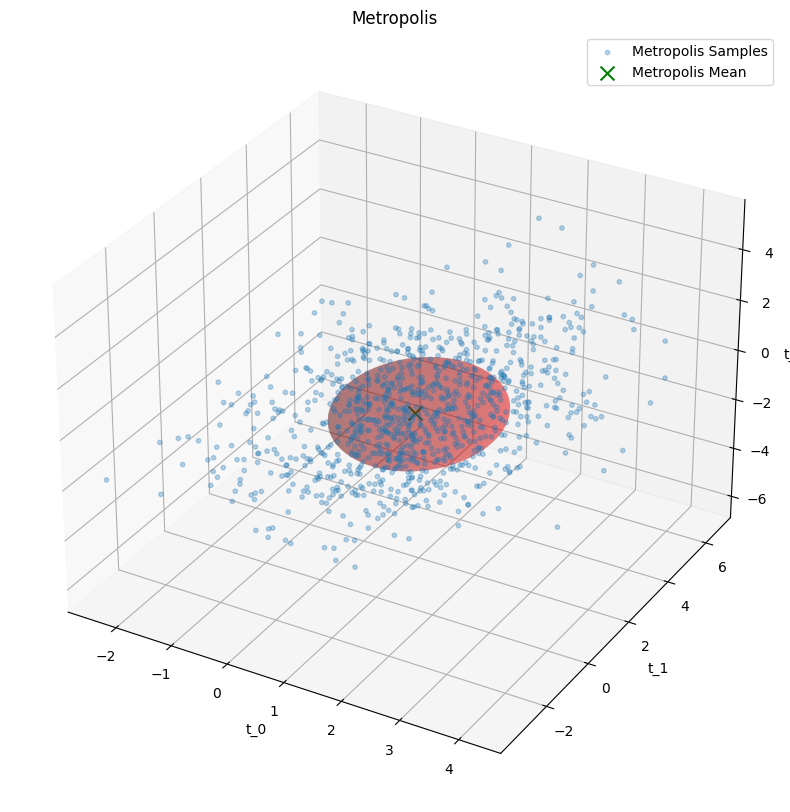

In [15]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# plot Gibbs samples
ax.scatter(chain[:,0], chain[:,1], chain[:,2], s=10, alpha=0.3, label='Metropolis Samples')

# plot Gibbs mean
ax.scatter(sample_mean[0], sample_mean[1], sample_mean[2], s=100, marker='x', color='g', label='Metropolis Mean')

# plot covariance ellipsoid
eig_vals, eig_vecs = np.linalg.eig(cov)
radii = np.sqrt(eig_vals)
u = np.linspace(0.0, 2.0 * np.pi, 100)
v = np.linspace(0.0, np.pi, 100)
x = radii[0] * np.outer(np.cos(u), np.sin(v))
y = radii[1] * np.outer(np.sin(u), np.sin(v))
z = radii[2] * np.outer(np.ones_like(u), np.cos(v))
for i in range(len(x)):
    for j in range(len(x)):
        [x[i,j],y[i,j],z[i,j]] = np.dot([x[i,j],y[i,j],z[i,j]], eig_vecs) + mean
ax.plot_surface(x, y, z, alpha=0.3, color='r')

# add labels and legend
ax.set_xlabel('t_0')
ax.set_ylabel('t_1')
ax.set_zlabel('t_2')
ax.set_title('Metropolis')
plt.legend()

plt.show()

### Finally, calculate the effective size, which also helps to tune thinning

In [16]:
#import tensorflow_probability as tfp
#import tensorflow as tf

#tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
#ess = tfp.mcmc.effective_sample_size(chain)[0]

#print(int(ess.numpy()))

# 563